<a href="https://colab.research.google.com/github/chiyeon01/Hands_On_Machine_Learning/blob/main/4%EC%9E%A5.%20%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80/6_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀(Logistic Regression)
로지스틱 회귀는 회귀지만, 분류에 많이 사용된다.(이진 분류기)<br/>
선형 회귀 모델처럼 입력 특성의 가중치 합을 계산한다.<br/> 대신 선형 회귀처럼 바로 값을 출력하지 않고 로지스틱(시그모이드 함수를 거친 값)을 출력한다.

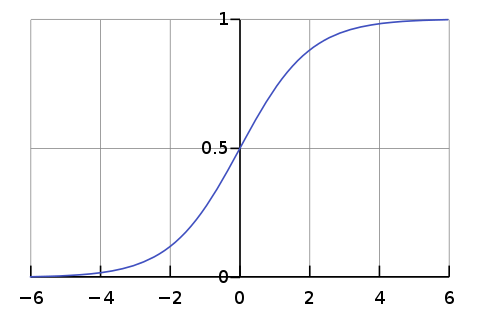

### iris data load

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.target.head()

,target
0,0
1,0
2,0
3,0
4,0


LogisticRegression 사용

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']]
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


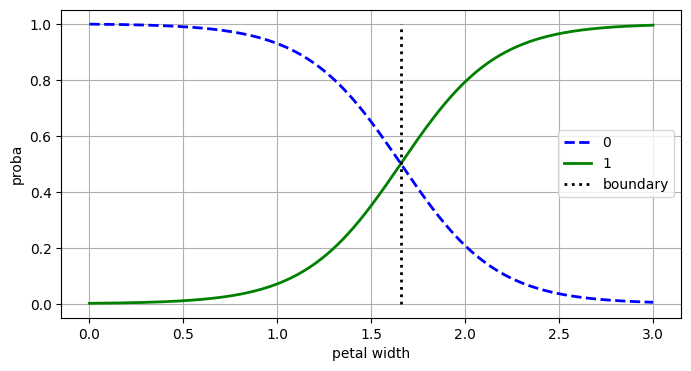

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 경계 설정해서 logistic regression이 어떻게 예측을 하는지 보여줌.

X_new = np.linspace(0,3,1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 4))
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2, label='0')
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label='1')
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth=2, label='boundary')

plt.grid(True)
plt.xlabel('petal width')
plt.ylabel('proba')
plt.legend()
plt.show()

In [ ]:
'''
추가로 공부한 점은
로지스틱 회귀가 다중 클래스를 어떻게 분류하는 지에 대한 점이다.
로지스틱 회귀는 기존 선형 회귀처럼 가중치 합을 계산한 후 로지스틱을 출력했지만, 다중 분류인 경우 소프트 맥스 함수를 적용한다.
즉, 모든 클래스에 대해 클래스일 확률이 나오게 된다.
또한, 이에 대해 GD는 비용함수 크로스 엔트로피 함수를 편미분 함으로써 정해진다.
(참고로 로지스틱 회귀는 비용함수로 로그 손실을 이용함.)
'''